In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import random
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [2]:
df=pd.read_csv('Airline.csv')

In [3]:
dfn=df[['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID']]

In [4]:
dfn.to_csv('file2.csv', header=False, index=False)

In [5]:
Graph=nx.read_edgelist('file2.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

In [6]:
nx.info(Graph)

'Name: \nType: DiGraph\nNumber of nodes: 1319\nNumber of edges: 27302\nAverage in degree:  20.6990\nAverage out degree:  20.6990'

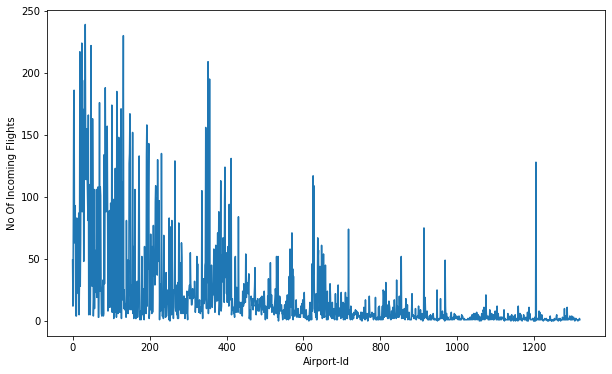

In [7]:
indegree_dist = list(dict(Graph.in_degree()).values())
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('Airport-Id')
plt.ylabel('No Of Incoming Flights')
plt.show()

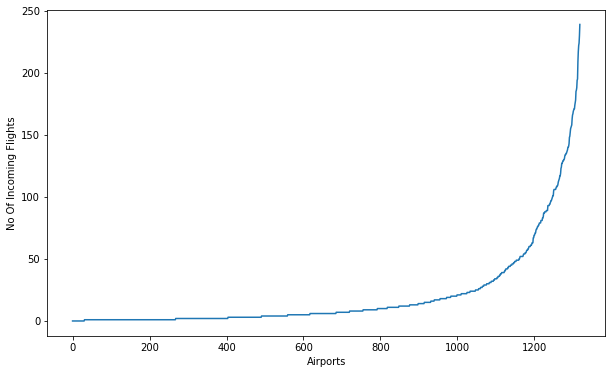

In [8]:
indegree_dist = list(dict(Graph.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('Airports')
plt.ylabel('No Of Incoming Flights')
plt.show()

In [9]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist,90+i))

90 percentile value is 60.0
91 percentile value is 69.0
92 percentile value is 78.55999999999995
93 percentile value is 87.0
94 percentile value is 93.91999999999985
95 percentile value is 106.0
96 percentile value is 115.55999999999995
97 percentile value is 131.92000000000007
98 percentile value is 148.63999999999987
99 percentile value is 173.4599999999998
100 percentile value is 239.0


In [10]:
### 99-100 percentile
## 99.9 percentile value is 228.09200000000146 this means only 0.1% of the total airports have 228 flights
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(indegree_dist,99+(i/100)))

99.1 percentile value is 176.27599999999984
99.2 percentile value is 181.19199999999933
99.3 percentile value is 185.7739999999999
99.4 percentile value is 188.5520000000006
99.5 percentile value is 194.41000000000008
99.6 percentile value is 205.19200000000092
99.7 percentile value is 217.23000000000025
99.8 percentile value is 222.72800000000007
99.9 percentile value is 228.09200000000146
100.0 percentile value is 239.0


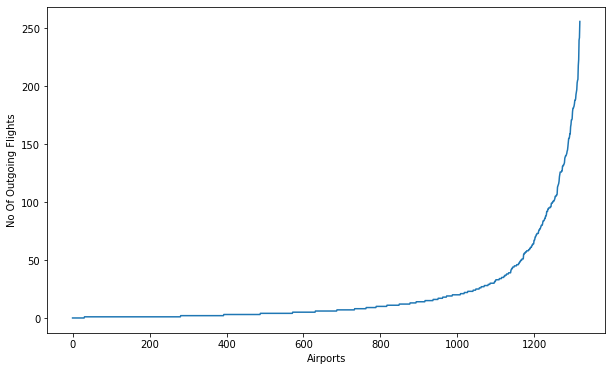

In [11]:
outdegree_dist = list(dict(Graph.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Airports')
plt.ylabel('No Of Outgoing Flights')
plt.show()


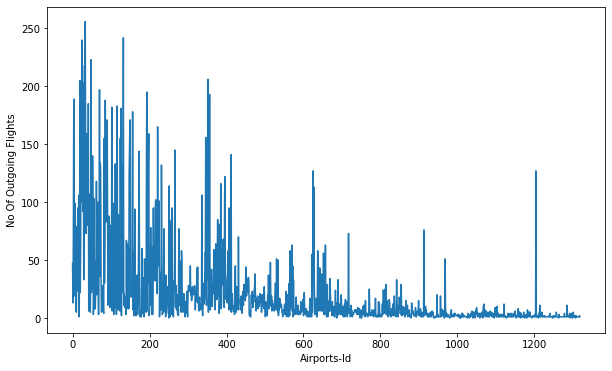

In [12]:
outdegree_dist = list(dict(Graph.out_degree()).values())
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Airports-Id')
plt.ylabel('No Of Outgoing Flights')
plt.show()


In [13]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree_dist,90+i))

90 percentile value is 59.0
91 percentile value is 67.0
92 percentile value is 76.0
93 percentile value is 84.74000000000001
94 percentile value is 95.0
95 percentile value is 102.09999999999991
96 percentile value is 122.55999999999995
97 percentile value is 135.84000000000015
98 percentile value is 157.91999999999962
99 percentile value is 187.4599999999998
100 percentile value is 256.0


In [14]:
print('No of Airports which doesnt have flights to any of the airports',sum(np.array(outdegree_dist)==0),'and % is',
                                sum(np.array(outdegree_dist)==0)*100/len(outdegree_dist) )

No of Airports which doesnt have flights to any of the airports 31 and % is 2.350265352539803


In [15]:
print('No of Airports which doesnt have any incoming flights',sum(np.array(indegree_dist)==0),'and % is',
                                sum(np.array(indegree_dist)==0)*100/len(indegree_dist) )

No of Airports which doesnt have any incoming flights 31 and % is 2.350265352539803


In [16]:
#no of airports
n=[]
for i in Graph.nodes():
    n.append(i)

In [17]:
len(n)

1319

In [18]:
#list of incoming flights of each airport
z=list(Graph.in_degree(n))


In [19]:
#list of airports with no incoming flights
c=0
l1=[]
s1={}
for i in z:
    if(i[1]==0):
        print(i[0])
        l1.append(i[0])
        c+=1
s1=set(l1)

15525
13195
13868
12187
11517
13689
14160
13736
13376
16512
16495
16663
13251
10741
16837
12062
15289
16541
10078
16821
12661
10089
15433
11035
16847
13536
16823
12595
11029
14848
16873


In [20]:
c

31

In [21]:
#list of outgoing flights of each airport
z1=list(Graph.out_degree(n))

In [22]:
#list of airports with no outgoing flights
c1=0
l2=[]
s2={}
for i in z1:
    if(i[1]==0):
        print(i[0])
        l2.append(i[0])
        c1+=1
s2=set(l2)

16336
16849
11992
14548
14435
15351
15978
10844
16846
14750
13523
10404
15980
13949
10836
16704
13157
16682
16429
11947
13865
16715
11496
16777
16519
11840
14744
10687
14475
13273
11355


In [23]:
c1

31

In [24]:
s1

{10078,
 10089,
 10741,
 11029,
 11035,
 11517,
 12062,
 12187,
 12595,
 12661,
 13195,
 13251,
 13376,
 13536,
 13689,
 13736,
 13868,
 14160,
 14848,
 15289,
 15433,
 15525,
 16495,
 16512,
 16541,
 16663,
 16821,
 16823,
 16837,
 16847,
 16873}

In [25]:
s2

{10404,
 10687,
 10836,
 10844,
 11355,
 11496,
 11840,
 11947,
 11992,
 13157,
 13273,
 13523,
 13865,
 13949,
 14435,
 14475,
 14548,
 14744,
 14750,
 15351,
 15978,
 15980,
 16336,
 16429,
 16519,
 16682,
 16704,
 16715,
 16777,
 16846,
 16849}

In [26]:
#intersection of airports with no incoming flights and no outgoing flights
s=s1.intersection(s2)

In [27]:
len(s)

0

In [28]:
s=s1.union(s2)

In [29]:
len(s)

62

In [30]:
#Here we are reading csv of edgelist
r = csv.reader(open('file2.csv','r'))
edges = dict()
for edge in r:
    edges[(edge[0], edge[1])] = 1

In [31]:
edges

{('10154', '12250'): 1,
 ('12250', '10154'): 1,
 ('10135', '12339'): 1,
 ('10135', '13244'): 1,
 ('10136', '12896'): 1,
 ('10140', '11413'): 1,
 ('10140', '11711'): 1,
 ('10140', '12896'): 1,
 ('10140', '13244'): 1,
 ('10141', '11637'): 1,
 ('10141', '11775'): 1,
 ('10154', '13541'): 1,
 ('10154', '14307'): 1,
 ('10157', '14893'): 1,
 ('10157', '15458'): 1,
 ('10170', '10299'): 1,
 ('10170', '11555'): 1,
 ('10194', '10423'): 1,
 ('10194', '10800'): 1,
 ('10194', '11292'): 1,
 ('10194', '11540'): 1,
 ('10194', '12266'): 1,
 ('10194', '12278'): 1,
 ('10194', '12892'): 1,
 ('10194', '12896'): 1,
 ('10194', '13158'): 1,
 ('10194', '13198'): 1,
 ('10194', '13244'): 1,
 ('10194', '13487'): 1,
 ('10194', '13796'): 1,
 ('10194', '13930'): 1,
 ('10194', '14683'): 1,
 ('10194', '14814'): 1,
 ('10194', '14831'): 1,
 ('10194', '14869'): 1,
 ('10194', '15304'): 1,
 ('10194', '15370'): 1,
 ('10257', '11618'): 1,
 ('10257', '13244'): 1,
 ('10257', '14648'): 1,
 ('10299', '10170'): 1,
 ('10299', '1155

In [32]:
len(Graph.edges())

27302

In [33]:
len(Graph.nodes())

1319

In [34]:
#Here we indexing the airport id's
node_indexing={}
index=1
for i in n:
    node_indexing[index]=i
    index+=1
    
node_indexing

{1: 10154,
 2: 12250,
 3: 10135,
 4: 12339,
 5: 13244,
 6: 10136,
 7: 12896,
 8: 10140,
 9: 11413,
 10: 11711,
 11: 10141,
 12: 11637,
 13: 11775,
 14: 13541,
 15: 14307,
 16: 10157,
 17: 14893,
 18: 15458,
 19: 10170,
 20: 10299,
 21: 11555,
 22: 10194,
 23: 10423,
 24: 10800,
 25: 11292,
 26: 11540,
 27: 12266,
 28: 12278,
 29: 12892,
 30: 13158,
 31: 13198,
 32: 13487,
 33: 13796,
 34: 13930,
 35: 14683,
 36: 14814,
 37: 14831,
 38: 14869,
 39: 15304,
 40: 15370,
 41: 10257,
 42: 11618,
 43: 14648,
 44: 11630,
 45: 12016,
 46: 12184,
 47: 10333,
 48: 11721,
 49: 10397,
 50: 11150,
 51: 11995,
 52: 10408,
 53: 13342,
 54: 13485,
 55: 10817,
 56: 14842,
 57: 10529,
 58: 10535,
 59: 12917,
 60: 10558,
 61: 11122,
 62: 10561,
 63: 13891,
 64: 10562,
 65: 10581,
 66: 14321,
 67: 10599,
 68: 10617,
 69: 12436,
 70: 10620,
 71: 11433,
 72: 12003,
 73: 13495,
 74: 13871,
 75: 10627,
 76: 11315,
 77: 10631,
 78: 10654,
 79: 12223,
 80: 10666,
 81: 11588,
 82: 11762,
 83: 14747,
 84: 10685,
 

In [35]:
len(node_indexing)

1319

In [36]:
#Inorder to perform classification we need to add missing edges. Since we have airports with edges between them hence we would have
# 1 between them and we should also have airports which do not have edges between them that is 0 between them.
# So we are adding missing edges between the airports which have shortest path greater than 2. Now we have 27302 edges and 27302 missing edges.
missing_edges = set([])
while (len(missing_edges)<27302):
    a=node_indexing[random.randint(1, 1319)]
    b=node_indexing[random.randint(1, 1319)]
    tmp = edges.get((a,b),-1)
    if tmp == -1 and a!=b:
            try:
                if nx.shortest_path_length(Graph,source=a,target=b) > 2: 
                    missing_edges.add((a,b))
                else:
                    continue  
            except:  
                    missing_edges.add((a,b))              
    else:
            continue

In [37]:
len(missing_edges)
missing_edges

{(13830, 16704),
 (13120, 10832),
 (14696, 16817),
 (12250, 13536),
 (10167, 13704),
 (15030, 13003),
 (14268, 13241),
 (14996, 16428),
 (13870, 16336),
 (16851, 14534),
 (11415, 15171),
 (14574, 16515),
 (12898, 12154),
 (10010, 14610),
 (13768, 10136),
 (12455, 15061),
 (13861, 10385),
 (12599, 14749),
 (10078, 16540),
 (11282, 13926),
 (16853, 16842),
 (11908, 15041),
 (11844, 12587),
 (14709, 10713),
 (11140, 14950),
 (12728, 13200),
 (12394, 16658),
 (12720, 14131),
 (12021, 14130),
 (11823, 10165),
 (14577, 12545),
 (15220, 14218),
 (11904, 12171),
 (10519, 15622),
 (15057, 10257),
 (15725, 10744),
 (14524, 12245),
 (14332, 10005),
 (12375, 12878),
 (16829, 13282),
 (10241, 11105),
 (11773, 14843),
 (14718, 11086),
 (12175, 10361),
 (16543, 15785),
 (14863, 13702),
 (14488, 10817),
 (12841, 13546),
 (12709, 11035),
 (12250, 13619),
 (10617, 11165),
 (10996, 10476),
 (10065, 12455),
 (11973, 12785),
 (13158, 14805),
 (10313, 14640),
 (10065, 14092),
 (12992, 11997),
 (15382, 12896

In [38]:
dfn


,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID
0,10154,12250
1,12250,10154
2,10135,12339
3,10135,13244
4,10135,13244
...,...,...
391109,13204,10397
391110,13204,10397
391111,12173,13830
391112,13830,12173


In [39]:
#The edges which are in edgelist of graph is added to positive_edges
positive_edges=set([])
for i in Graph.edges():
    positive_edges.add((i[0],i[1]))

In [40]:
len(positive_edges)

27302

In [41]:
df_pos = pd.DataFrame(list(positive_edges), columns=['source_node', 'destination_node'])
df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])
    
print("Number of nodes in the graph with edges", df_pos.shape[0])
print("Number of nodes in the graph without edges", df_neg.shape[0])
    
#Here we have splitted the data into train and test with 60:40 ratio.    
#We are training postive edges and then adding negative edges to our data in order to do classification.
#We are giving one's to positive edges and zero's to negative edges.
X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.4, random_state=9)
X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.4, random_state=9)


Number of nodes in the graph with edges 27302
Number of nodes in the graph without edges 27302


In [42]:
#We are creating csv file of these train and test dataset
X_train_pos.to_csv('train_pos.csv',header=False, index=False)
X_test_pos.to_csv('test_pos.csv',header=False, index=False)
X_train_neg.to_csv('train_neg.csv',header=False, index=False)
X_test_neg.to_csv('test_neg.csv',header=False, index=False)

In [43]:
#We are creating directed graph using networkx inorder to get more insights for positive edges dataset.
train_graph=nx.read_edgelist('train_pos.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
test_graph=nx.read_edgelist('test_pos.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(train_graph))
print(nx.info(test_graph))

train_nodes_pos = set(train_graph.nodes())
test_nodes_pos = set(test_graph.nodes())

trY_teY = len(train_nodes_pos.intersection(test_nodes_pos))
trY_teN = len(train_nodes_pos - test_nodes_pos)
teY_trN = len(test_nodes_pos - train_nodes_pos)

print('No of Airports common in train and test -- ',trY_teY)
print('No of Airports present in train but not present in test -- ',trY_teN)

print('No of Airports present in test but not present in train -- ',teY_trN)
print(' % of Airports not there in Train but exist in Test in total Test data are {} %'.format(teY_trN/len(test_nodes_pos)*100))

Name: 
Type: DiGraph
Number of nodes: 1253
Number of edges: 16381
Average in degree:  13.0734
Average out degree:  13.0734
Name: 
Type: DiGraph
Number of nodes: 1193
Number of edges: 10921
Average in degree:   9.1542
Average out degree:   9.1542
No of Airports common in train and test --  1127
No of Airports present in train but not present in test --  126
No of Airports present in test but not present in train --  66
 % of Airports not there in Train but exist in Test in total Test data are 5.532271584241409 %


In [44]:
train_graph.edges

OutEdgeView([(12365, 13930), (12365, 14122), (12365, 10135), (12365, 14100), (12365, 14711), (13930, 11471), (13930, 12884), (13930, 10372), (13930, 12441), (13930, 15380), (13930, 12124), (13930, 15370), (13930, 13486), (13930, 13851), (13930, 13367), (13930, 12995), (13930, 14492), (13930, 12511), (13930, 12266), (13930, 14262), (13930, 15016), (13930, 10409), (13930, 10967), (13930, 14877), (13930, 14952), (13930, 10469), (13930, 10194), (13930, 10990), (13930, 11721), (13930, 11122), (13930, 10821), (13930, 10136), (13930, 11433), (13930, 12206), (13930, 11423), (13930, 13184), (13930, 11823), (13930, 11577), (13930, 10434), (13930, 11638), (13930, 14783), (13930, 13485), (13930, 13121), (13930, 15167), (13930, 12397), (13930, 11977), (13930, 14314), (13930, 14908), (13930, 12898), (13930, 14730), (13930, 11375), (13930, 14512), (13930, 14802), (13930, 14711), (13930, 13290), (13930, 10140), (13930, 12448), (13930, 10747), (13930, 10158), (13930, 11612), (13930, 13898), (13930, 106

In [45]:
#We are creating directed graph using networkx inorder to get more insights for negative edges dataset.
train_graph1=nx.read_edgelist('train_neg.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
test_graph1=nx.read_edgelist('test_neg.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print("Missing Edges")
print(nx.info(train_graph1))
print(nx.info(test_graph1))

train_nodes_neg = set(train_graph1.nodes())
test_nodes_neg = set(test_graph1.nodes())

trY_teY = len(train_nodes_neg.intersection(test_nodes_neg))
trY_teN = len(train_nodes_neg - test_nodes_neg)
teY_trN = len(test_nodes_neg - train_nodes_neg)

print('No of Airports common in train and test -- ',trY_teY)
print('No of Airports present in train but not present in test -- ',trY_teN)

print('No of Airports present in test but not present in train -- ',teY_trN)
print(' % of Airports not there in Train but exist in Test in total Test data are {} %'.format(teY_trN/len(test_nodes_neg)*100))

Missing Edges
Name: 
Type: DiGraph
Number of nodes: 1319
Number of edges: 16381
Average in degree:  12.4193
Average out degree:  12.4193
Name: 
Type: DiGraph
Number of nodes: 1318
Number of edges: 10921
Average in degree:   8.2860
Average out degree:   8.2860
No of Airports common in train and test --  1318
No of Airports present in train but not present in test --  1
No of Airports present in test but not present in train --  0
 % of Airports not there in Train but exist in Test in total Test data are 0.0 %


In [46]:
#Here we are concatenating positive and negative edges.
X_train = X_train_pos.append(X_train_neg,ignore_index=True)
y_train = np.concatenate((y_train_pos,y_train_neg))
X_test = X_test_pos.append(X_test_neg,ignore_index=True)
y_test = np.concatenate((y_test_pos,y_test_neg)) 

In [47]:
#Here we are putting train and test data into csv file
X_train.to_csv('X_train.csv',header=False,index=False)
X_test.to_csv('X_test.csv',header=False,index=False)
pd.DataFrame(y_train.astype(int)).to_csv('y_train.csv',header=False,index=False)
pd.DataFrame(y_test.astype(int)).to_csv('y_test.csv',header=False,index=False)

In [48]:
print("Data points in train data",X_train.shape)
print("Data points in test data",X_test.shape)
print("Shape of target variable in train",y_train.shape)
print("Shape of target variable in test", y_test.shape)

Data points in train data (32762, 2)
Data points in test data (21842, 2)
Shape of target variable in train (32762,)
Shape of target variable in test (21842,)


In [49]:
#We are training positive edges for featurization. Here we have created train and test graph of positive edges.

In [50]:
train_graph=nx.read_edgelist('train_pos.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
test_graph=nx.read_edgelist('test_pos.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)


In [51]:
len(test_graph.edges)

10921

# Featurization

In [52]:
#If there is flight from A to {C,D...} and B to {C,D...} then there are high chances of flight to be present between A to B
def NumFlights(df_final):
    #calculating no of outgoing flights and incoming flights for source and destination
    #calculating intersection of outgoing flights and incoming flights for source and destination

    num_outgoing_flights_s=[]
    num_incoming_flights_s=[]
    num_outgoing_flights_d=[]
    num_incoming_flights_d=[]
    inter_outgoing_flights=[]
    inter_incoming_flights=[]
    for i,row in df_final.iterrows():
        try:
            s1=set(train_graph.predecessors(row['source_node']))
            s2=set(train_graph.successors(row['source_node']))
        except:
            s1 = set()
            s2 = set()
        try:
            d1=set(train_graph.predecessors(row['destination_node']))
            d2=set(train_graph.successors(row['destination_node']))
        except:
            d1 = set()
            d2 = set()
        num_outgoing_flights_s.append(len(s1))
        num_incoming_flights_s.append(len(s2))

        num_outgoing_flights_d.append(len(d1))
        num_incoming_flights_d.append(len(d2))

        inter_outgoing_flights.append(len(s1.intersection(d1)))
        inter_incoming_flights.append(len(s2.intersection(d2)))
    
    #return num_outgoing_flights_s,num_outgoing_flights_d, num_incoming_flights_s, num_incoming_flights_d, inter_outgoing_flights, inter_incoming_flights
    return inter_outgoing_flights,inter_incoming_flights

### Jaccard Coefficient (X,Y) =  |X∩Y| / |X∪Y|

In [53]:
#If the ratio of common flights and total flights between two airports is more then it is more likely of having flight between them.
def jaccard_for_outgoing_flights(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim1 = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))
        sim2=(len(set(train_graph.successors(a)).union(set(train_graph.successors(b)))))
        sim=sim1/sim2
    except:
        return 0
    return sim

###  Preferential Attachment : ||X||*||Y||

In [54]:
#Here ||X|| and ||Y|| are no of incoming flights of airports a and b.
def preferential_indegree(a,b):
    try:
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0
        sim = len(set(train_graph.predecessors(a)))*len(set(train_graph.predecessors(b)))
    except:
        return 0
    return sim

In [55]:
#Here ||X|| and ||Y|| are no of outgoing flights of airports a and b.
def preferential_outdegree(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = len(set(train_graph.successors(a)))*len(set(train_graph.successors(b)))
    except:
        return 0
    return sim

In [56]:
#If the ratio of common flights and total flights between two airports is more then it is more likely of having flight between them.
def jaccard_for_incoming_flights(a,b):
    try:
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0
        sim1 = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))
        sim2=(len(set(train_graph.predecessors(a)).union(set(train_graph.predecessors(b)))))
        sim=sim1/sim2
    except:
        return 0
    return sim

In [57]:
# #for followees
# def cosine_for_followees(a,b):
#     try:
#         if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
#             return 0
#         sim1 = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))
#         sim2=  float((math.sqrt(len(set(train_graph.successors(a)))*len((set(train_graph.successors(b)))))))
#         return sim1/sim2
#     except:
#         return -1

In [58]:
# def cosine_for_followers(a,b):
#     try:
        
#         if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
#             return 0
#         sim1 = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))
#         sim2 = float((math.sqrt(len(set(train_graph.predecessors(a))))*(len(set(train_graph.predecessors(b))))))
#         return sim1/sim2
#     except:
#         return -1

### Adamic_Adar_Index

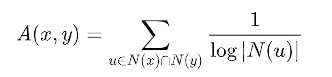

In [59]:
#Here, let’s say, U1 and U2 are two vertex belonging to intersection of N(x) and N(y) and both are connected to both x and y.
#U1 has very large neighborhood, so it’s probably a busy airport. So there is a very small chance that x and y will have flight between them.
#While U2 has small neighborhood. As it has small group, it can belong to a college group or work group, so x and y can be related in this case.
#As size of the N(u) increases, log(N(u)) increases and 1/log(N(u)) decreases. So contribution os nodes like U1 who have large no neighbors, their Adar Index is small and vice versa.

#Let's say we have two intersection of a and b i.e. u1 and u2. If there are more incoming flights to say u1 then it might happen
#that it is main airport and a,b doesn't have flight between them. But if there are less incoming flights then it means a,b and u2
#should be connected. Hence a and b should have a flight between them.
def adamic_adar(a,b):
    sum=0
    try:
        n=list(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))
        if len(n)!=0:
            for i in n:
                if len(list(train_graph.predecessors(i)))!=0 and len(list(train_graph.predecessors(i)))!=1:
                    sum=sum+(1/np.log10(len(list(train_graph.predecessors(i)))))
            return sum
        else:
            return 0
    except:
        return 0

## Kartz Centrality

In [60]:
# Katz centrality computes the relative influence of a airport within a network by measuring the 
#number of the immediate neighbors (first degree nodes) and also all other nodes in the network that 
#connect to the node under consideration through these immediate neighbors. Connections made with 
#distant neighbors are, however, penalized by an attenuation factor alpha . Each path or connection 
#between a pair of nodes is assigned a weight determined by alpha and the distance between nodes as 
# alpha ^{d} where d is the distance between 2 airports in the graph.


## 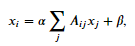

In [61]:
kartz_Centrality = nx.katz.katz_centrality(train_graph,alpha=0.005,beta=1)

In [62]:
kartz_Centrality

{12365: 0.026222393359694614,
 13930: 0.05128732805416438,
 10599: 0.038583565369412556,
 14696: 0.03832250377351448,
 11267: 0.033107432593196505,
 13487: 0.046489817260191336,
 10874: 0.031266641008314874,
 11433: 0.04319323100018153,
 15016: 0.04185284466823501,
 12992: 0.035175050379801065,
 12278: 0.03595261075906953,
 11775: 0.03315069867452216,
 11823: 0.03473717551478714,
 12615: 0.02659313879056331,
 15478: 0.03015388612033878,
 14843: 0.030197135647927358,
 10821: 0.04298415860696987,
 10785: 0.03238303527399253,
 12478: 0.041637748165854596,
 10299: 0.04447512668728982,
 11445: 0.027314528693969282,
 15709: 0.02758921622173446,
 12704: 0.026860535822179038,
 13461: 0.03871837975573874,
 11527: 0.026042344639425008,
 11697: 0.040560065602391976,
 12094: 0.02912141879539466,
 12129: 0.02614490738267185,
 12451: 0.03576704570933329,
 16422: 0.026121991859149832,
 10135: 0.034375882723078954,
 16101: 0.026734867450100952,
 14057: 0.0374985769236313,
 12266: 0.0443758195210782,
 

In [63]:
avg_kartz_Centrality = float(sum(kartz_Centrality.values())) / len(kartz_Centrality)
print(avg_kartz_Centrality)

0.027979214213133746


## weakly connected

In [64]:
# if there is an direct flight between airport a and b then we will first remove that edge from the
# graph and then we will find shortest path between a and b if it exists. if there exist a shortest path
#between them then we will return 1 it means they are in same wcc and have something in common else we
# will return 0 which means they are in different wcc. and same for flight b to a.

In [65]:
#if has direct edge then deleting that edge and calculating shortest path
def finding_shortest_path(src,dest):
    p=-1
    try:
        if train_graph.has_edge(src,dest):
            train_graph.remove_edge(src,dest)#because of there are only 4 wcc out of which one wcc has almost
            #all the edges so if we wont remove the edge they will always be the same part of wcc which 
            #would lead to connecting all the nodes.
            short_path= nx.shortest_path_length(train_graph,source=src,target=dest)
            train_graph.add_edge(src,dest)
        else:
            short_path= nx.shortest_path_length(train_graph,source=src,target=dest)
        return short_path
    except:
        return -1

## Page Rank

In [66]:
#Page rank finds the nodes of high importance i.e airports with large no of incoming flights so there
#is a high chance that new airports will be connected to this important airport.
Page_rank = nx.pagerank(train_graph, alpha=0.85)

In [67]:
avg_Page_rank = float(sum(Page_rank.values())) / len(Page_rank)

In [68]:
#getting weekly connected edges from graph 
xyz=0
weakly_cc=list(nx.weakly_connected_components(train_graph))
def check_for_wcc_belongigness(src,dest):
    count_wcc=0
    index = []
    if train_graph.has_edge(dest,src):
        for i in weakly_cc:
            if dest in i:
                index = i
                break
        #if (a in index):
        train_graph.remove_edge(dest,src)
        if finding_shortest_path(dest,src)==-1:
            train_graph.add_edge(dest,src)
            return 0
        else:
            train_graph.add_edge(dest,src)
            return 1
#         else:
#             return 0
            
    if train_graph.has_edge(src,dest):
            for i in weakly_cc:
                if src in i:
                    index= i
                    break
            #if (b in index):
            train_graph.remove_edge(src,dest)
            if finding_shortest_path(src,dest)==-1:
                train_graph.add_edge(src,dest)
                return 0
            else:
                train_graph.add_edge(src,dest)
                return 1
#             else:
#                 return 0
    else:
        if not train_graph.has_edge(src,dest) and not train_graph.has_edge(dest,src):  
            for i in weakly_cc:
                if src in i:
                    index= i
                    break         
            if(dest in index): 
                return 1
            else:
                return 0
            

In [69]:
df_final_train = pd.read_csv("X_train.csv", names=['source_node', 'destination_node'])
df_final_train['indicator_link'] = pd.read_csv("y_train.csv",names=['indicator_link'])
print("Our train matrix size ",df_final_train.shape)
df_final_train.head(2)

Our train matrix size  (32762, 3)


,source_node,destination_node,indicator_link
0,12365,13930,1
1,10599,14696,1


In [70]:
df_final_test  = pd.read_csv("X_test.csv", names=['source_node', 'destination_node'])
df_final_test['indicator_link'] = pd.read_csv("y_test.csv", names=['indicator_link'])
print("Our test matrix size ",df_final_test.shape)
df_final_test.head(2)

Our test matrix size  (21842, 3)


,source_node,destination_node,indicator_link
0,15380,11618,1
1,12478,11996,1


In [71]:
#Applying jaccard coefficient
df_final_train['jaccard_for_incoming_flights'] = df_final_train.apply(lambda row:jaccard_for_incoming_flights(row['source_node'],row['destination_node']),axis=1)
df_final_test['jaccard_for_incoming_flights'] = df_final_test.apply(lambda row:jaccard_for_incoming_flights(row['source_node'],row['destination_node']),axis=1)

     
df_final_train['jaccard_for_outgoing_flights'] = df_final_train.apply(lambda row:jaccard_for_outgoing_flights(row['source_node'],row['destination_node']),axis=1)
df_final_test['jaccard_for_outgoing_flights'] = df_final_test.apply(lambda row:jaccard_for_outgoing_flights(row['source_node'],row['destination_node']),axis=1)


#Applying Adamic Adar index
df_final_train['adamic_adar'] = df_final_train.apply(lambda row: adamic_adar(row['source_node'],row['destination_node']),axis=1)
df_final_test['adamic_adar'] = df_final_test.apply(lambda row: adamic_adar(row['source_node'],row['destination_node']),axis=1)

#Applying NumFlights
#df_final_train['num_outgoing_flights_s'], df_final_train['num_outgoing_flights_d'], \
#df_final_train['num_incoming_flights_s'], df_final_train['num_incoming_flights_d'], \
df_final_train['inter_outgoing_flights'], df_final_train['inter_incoming_flights']= NumFlights(df_final_train)

#Applying NumFlights
#df_final_test['num_outgoing_flights_s'], df_final_test['num_outgoing_flights_d'], \
#df_final_test['num_incoming_flights_s'], df_final_test['num_incoming_flights_d'], \
df_final_test['inter_outgoing_flights'], df_final_test['inter_incoming_flights']= NumFlights(df_final_test)

#Preferential Attachment
df_final_train['preferential_outdegree'] = df_final_train.apply(lambda row: preferential_outdegree(row['source_node'],row['destination_node']),axis=1)
   
df_final_test['preferential_outdegree'] = df_final_test.apply(lambda row: preferential_outdegree(row['source_node'],row['destination_node']),axis=1)
df_final_train['preferential_indegree'] = df_final_train.apply(lambda row: preferential_indegree(row['source_node'],row['destination_node']),axis=1)
   
df_final_test['preferential_indegree'] = df_final_test.apply(lambda row: preferential_indegree(row['source_node'],row['destination_node']),axis=1)

#Kartz
df_final_train['kartz_src'] = df_final_train.source_node.apply(lambda x: kartz_Centrality.get(x,avg_kartz_Centrality))
df_final_train['kartz_dest'] = df_final_train.destination_node.apply(lambda x: kartz_Centrality.get(x,avg_kartz_Centrality))
df_final_test['kartz_src'] = df_final_test.source_node.apply(lambda x: kartz_Centrality.get(x,avg_kartz_Centrality))
df_final_test['kartz_dest'] = df_final_test.destination_node.apply(lambda x: kartz_Centrality.get(x,avg_kartz_Centrality))
#weekly connected
df_final_train['wcc_result'] = df_final_train.apply(lambda row: check_for_wcc_belongigness(row['source_node'],row['destination_node']),axis=1)       
##mapping same component of wcc or not on train
print("_______________")
df_final_test['wcc_result'] = df_final_test.apply(lambda row: check_for_wcc_belongigness(row['source_node'],row['destination_node']),axis=1)
#Page Rank
df_final_train['page_rank_src'] = df_final_train.source_node.apply(lambda x:Page_rank.get(x,avg_Page_rank))
df_final_train['page_rank_dest'] = df_final_train.destination_node.apply(lambda x:Page_rank.get(x,avg_Page_rank))

df_final_test['page_rank_src'] = df_final_test.source_node.apply(lambda x:Page_rank.get(x,avg_Page_rank))
df_final_test['page_rank_dest'] = df_final_test.destination_node.apply(lambda x:Page_rank.get(x,avg_Page_rank))

_______________


In [72]:
 df_final_train[df_final_train['wcc_result']==1].count()

source_node                     30366
destination_node                30366
indicator_link                  30366
jaccard_for_incoming_flights    30366
jaccard_for_outgoing_flights    30366
adamic_adar                     30366
inter_outgoing_flights          30366
inter_incoming_flights          30366
preferential_outdegree          30366
preferential_indegree           30366
kartz_src                       30366
kartz_dest                      30366
wcc_result                      30366
page_rank_src                   30366
page_rank_dest                  30366
dtype: int64

In [73]:
df_final_train

,source_node,destination_node,indicator_link,jaccard_for_incoming_flights,jaccard_for_outgoing_flights,adamic_adar,inter_outgoing_flights,inter_incoming_flights,preferential_outdegree,preferential_indegree,kartz_src,kartz_dest,wcc_result,page_rank_src,page_rank_dest
0,12365,13930,1,0.012903,0.012422,1.316749,2,2,790,462,0.026222,0.051287,1,0.000290,0.006844
1,10599,14696,1,0.241071,0.140000,7.456491,27,14,3213,4830,0.038584,0.038323,1,0.002786,0.003022
2,11267,13487,1,0.127660,0.150602,13.566261,18,25,7140,4680,0.033107,0.046490,1,0.001732,0.004949
3,10874,11433,1,0.150442,0.171875,13.172406,17,22,4104,3000,0.031267,0.043193,1,0.001223,0.004202
4,15016,12992,1,0.175000,0.181818,12.240341,21,22,4770,4590,0.041853,0.035175,1,0.003897,0.002072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32757,12786,11013,0,0.000000,0.000000,0.000000,0,0,21,12,0.025981,0.026773,1,0.000325,0.000342
32758,10832,12544,0,0.000000,0.000000,0.000000,0,0,0,0,0.027979,0.027723,0,0.000798,0.000510
32759,11396,14306,0,0.000000,0.000000,0.000000,0,0,3,2,0.025884,0.026101,1,0.000169,0.000212
32760,11076,16679,0,0.000000,0.000000,0.000000,0,0,0,9,0.027170,0.025895,1,0.000609,0.000163


In [74]:
#Here we have collected all the features required.
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_for_incoming_flights', 'jaccard_for_outgoing_flights',
       'adamic_adar', 'inter_outgoing_flights', 'inter_incoming_flights',
       'preferential_outdegree', 'preferential_indegree', 'kartz_src',
       'kartz_dest', 'wcc_result', 'page_rank_src', 'page_rank_dest'],
      dtype='object')

In [75]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [76]:
y_train

0        1
1        1
2        1
3        1
4        1
        ..
32757    0
32758    0
32759    0
32760    0
32761    0
Name: indicator_link, Length: 32762, dtype: int64

In [77]:
#We have dropped the columns of source node and destination nodes since we need to apply algorithm and we don't need them.
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [78]:
#We are converting data into numpy since our algorithm need it in form of numpy
X=df_final_train.to_numpy()
print(X)
Y=y_train.to_numpy()
print(Y)

[[1.29032258e-02 1.24223602e-02 1.31674877e+00 ... 1.00000000e+00
  2.89865386e-04 6.84380779e-03]
 [2.41071429e-01 1.40000000e-01 7.45649054e+00 ... 1.00000000e+00
  2.78636193e-03 3.02182060e-03]
 [1.27659574e-01 1.50602410e-01 1.35662614e+01 ... 1.00000000e+00
  1.73174707e-03 4.94934651e-03]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  1.69298948e-04 2.11681523e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  6.09219965e-04 1.63107544e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  5.39627345e-04 2.29459175e-04]]
[1 1 1 ... 0 0 0]


In [79]:
X

array([[1.29032258e-02, 1.24223602e-02, 1.31674877e+00, ...,
        1.00000000e+00, 2.89865386e-04, 6.84380779e-03],
       [2.41071429e-01, 1.40000000e-01, 7.45649054e+00, ...,
        1.00000000e+00, 2.78636193e-03, 3.02182060e-03],
       [1.27659574e-01, 1.50602410e-01, 1.35662614e+01, ...,
        1.00000000e+00, 1.73174707e-03, 4.94934651e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.69298948e-04, 2.11681523e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 6.09219965e-04, 1.63107544e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 5.39627345e-04, 2.29459175e-04]])

In [80]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [81]:
len(X)

32762

In [82]:
len(Y)

32762

In [83]:
#Here we are applying classification algorithm i.e SVM
clf = svm.SVC()
clf.fit(X, Y)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [84]:
#Converting test data into numpy and we will test this on our algorithm to predict y and them analyze our actual y_test and predicted y.
X_test=df_final_test.to_numpy()
X_test
Y_test=y_test.to_numpy()

In [85]:
X_test

array([[1.30434783e-01, 8.06451613e-02, 5.58818077e+00, ...,
        1.00000000e+00, 8.99460405e-04, 3.45722081e-03],
       [2.03252033e-01, 2.13675214e-01, 1.32573853e+01, ...,
        1.00000000e+00, 4.11779121e-03, 2.26818863e-03],
       [1.82608696e-01, 2.12389381e-01, 1.30092824e+01, ...,
        1.00000000e+00, 2.26818863e-03, 3.74815993e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 2.90067667e-04, 2.14782077e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.69592654e-04, 5.39236201e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 3.81951355e-04, 1.66307879e-03]])

In [86]:
Y_test

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [87]:
len(Y_test)

21842

In [88]:
#Here we are predicting by providing X_test data.
predict_SVM=clf.predict(X_test)

In [89]:
predict_SVM

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [90]:
#After the prediction is done we are calculating the accuracy score by providing y_test and predicted data.
accuracy_score(Y_test, predict_SVM)

0.8796355645087446

In [91]:
DF = pd.DataFrame(Y_test,columns=["Y_test"])

In [92]:
DF["Predict"]=predict_SVM

In [93]:
DF

,Y_test,Predict
0,1,1
1,1,1
2,1,1
3,1,0
4,1,1
...,...,...
21837,0,0
21838,0,0
21839,0,0
21840,0,0


In [94]:
#We are saving the data y_test and predicted y into csv
DF.to_csv("Prediction.csv")

In [95]:
#Here we are printing the count which got mispredicted
c=0
for i in range(len(Y_test)):
    if(Y_test[i]!=predict_SVM[i]):
        #print(i)
        c+=1


### Here we have to print source and dest nodes id's

In [96]:
print(c)

2629


In [97]:
accuracy_score(Y_test, predict_SVM)

0.8796355645087446

In [98]:
cm=confusion_matrix(Y_test,predict_SVM)

In [99]:
df_cm = pd.DataFrame(cm, index = [i for i in "10"],
                  columns = [i for i in "10"])

Text(33.0, 0.5, 'True labels')

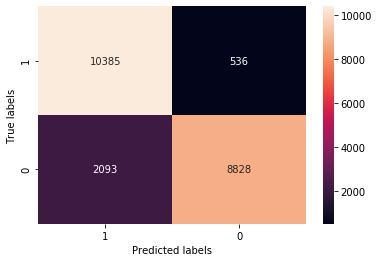

In [100]:
ax= plt.subplot()
sn.heatmap(df_cm, annot=True,fmt='g',ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 

In [101]:
from sklearn import tree
#We are applying decision tree classifier algorithm to check whether it improves our accuracy or not.
t = tree.DecisionTreeClassifier()

t.fit(X, Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [102]:
predict_Decision_tree=t.predict(X_test)


In [103]:
#Here are the accuracy scores of y_test and y_predict
accuracy_score(Y_test, predict_Decision_tree)

0.9567347312517169

In [104]:
#for decesion tree
cm_decision_tree=confusion_matrix(Y_test,predict_Decision_tree)

In [105]:
df_cm1 = pd.DataFrame(cm_decision_tree, index = [i for i in "10"],
                  columns = [i for i in "10"])

Text(33.0, 0.5, 'True labels')

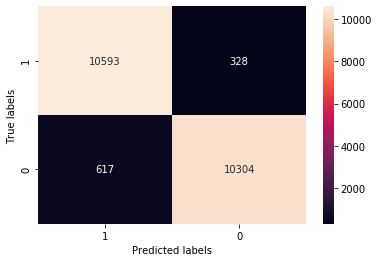

In [106]:
ax= plt.subplot()
sn.heatmap(df_cm1, annot=True,fmt='g',ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 

In [107]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [108]:
predict_KNN=classifier.predict(X_test)

In [109]:
accuracy_score(Y_test, predict_KNN)

0.8998260232579434

In [110]:
cm_knn=confusion_matrix(Y_test,predict_KNN)

In [111]:
df_cm3 = pd.DataFrame(cm_knn, index = [i for i in "10"],
                  columns = [i for i in "10"])

Text(33.0, 0.5, 'True labels')

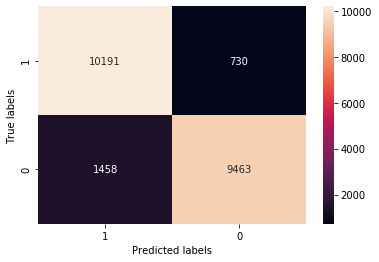

In [112]:
ax= plt.subplot()
sn.heatmap(df_cm3, annot=True,fmt='g',ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 

In [113]:
from sklearn.naive_bayes import GaussianNB

In [114]:
gnb = GaussianNB()

In [115]:
y_pred_NB = gnb.fit(X,Y).predict(X_test)

In [116]:
y_pred_NB

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [117]:
#Here are the accuracy scores of y_test and y_predict
accuracy_score(Y_test, y_pred_NB)

0.9601226993865031

In [118]:
#for naive bayes
cm_NB=confusion_matrix(Y_test,y_pred_NB)

In [119]:
df_cm2 = pd.DataFrame(cm_NB, index = [i for i in "10"],
                  columns = [i for i in "10"])

Text(33.0, 0.5, 'True labels')

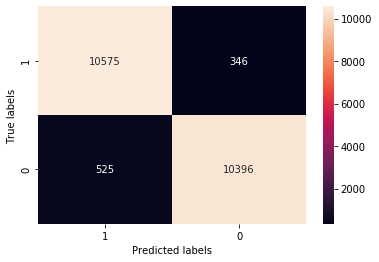

In [120]:
ax= plt.subplot()
sn.heatmap(df_cm2, annot=True,fmt='g',ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 

In [121]:
#Here are the accuracy scores of y_test and y_predict 
accuracy_score(Y_test, predict_SVM)

0.8796355645087446

In [122]:
#Here are the accuracy scores of y_test and y_predict 
accuracy_score(Y_test, predict_Decision_tree)

0.9567347312517169

In [123]:
#Here are the precision scores of y_test and y_predict using Naive Bayes
precision_score(Y_test, y_pred_NB, average='macro') 

0.9602463429730232

In [124]:
#Here are the recall scores of y_test and y_predict using Naive Bayes
recall_score(Y_test, y_pred_NB, average='macro')

0.9601226993865031

In [125]:
#Here are the precision scores of y_test and y_predict using SVM
precision_score(Y_test, predict_SVM, average='macro') 

0.887512145254332

In [126]:
#Here are the recall scores of y_test and y_predict using SVM
recall_score(Y_test, predict_SVM, average='macro') 

0.8796355645087446

In [127]:
#Here are the precision scores of y_test and y_predict using Decision_Tree
precision_score(Y_test, predict_Decision_tree, average='macro') 

0.9570547969571939

In [128]:
#Here are the recall scores of y_test and y_predict using Decision_Tree
recall_score(Y_test, predict_Decision_tree, average='macro') 

0.9567347312517169